In [1]:
#Import packages needed to run code
import matplotlib
import matplotlib.pyplot as plt #v3.1.3
import os
import math
import matplotlib.cm as cm
from matplotlib.pylab import *
import numpy as np #v1.18.1
import pandas as pd #v1.0.1
import seaborn as sns #v0.10.0
import cmocean #v2.0
import netCDF4 as nc #v1.5.3
from netCDF4 import Dataset as NetCDFFile
import cartopy as cp #v0.16.0
import cartopy.crs as ccrs 
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.io import shapereader
import scipy.stats as ss
import scipy
import gsw
import matplotlib.patches as patches
import requests
import csv
from mpl_toolkits.basemap import Basemap
import pickle as pickle

In [ ]:
#import data from csv file

# infile = "../Data/Data_sequencing/Level_3/3_ActualNumbers_ForPython.csv"
# data_Actual = pd.read_csv(infile,sep=(','))
# data_Actual

In [9]:
infile = "../Data/Sik_CTD_2/station_loc_ctd_Sik17.txt"
station_loc = pd.read_csv(infile,sep=(','))
station_loc

,Lat_deg,Long_deg,Station,CTD_st,Depth
0,71.46920,-150.98890,2.10,ctd004,NaN
1,71.42427,-151.01749,2.20,ctd005,NaN
2,71.37872,-151.04523,2.30,ctd006,NaN
3,71.33325,-151.07271,2.40,ctd007,NaN
4,71.28900,-151.09906,2.50,ctd008,NaN
5,71.24314,-151.12838,2.60,ctd009,NaN
6,71.19836,-151.15700,2.70,ctd010,NaN
7,71.15284,-151.18412,2.80,ctd011,NaN
8,71.10636,-151.21426,2.90,ctd012,NaN
9,71.06110,-151.24318,2.10,ctd013,NaN


In [10]:
#Use this link to choose your bathymetry area. Then use gdal_translate to convert to nc.
#gdal_translate -of netCDF exportImage.tiff output.nc
#https://maps.ngdc.noaa.gov/viewers/wcs-client/

#Import bathymetry data as a pandas dataframe
infile = '../Data/output.nc'
bathy_df = nc.Dataset(infile)
blat = bathy_df.variables['lat'][:]
blon = bathy_df.variables['lon'][:]
bathy = bathy_df.variables['Band1'][:]

#Import station lat longs, I don't use this in this figure.
# infile = "./OlderFiles/CTD_LatLong_T2.txt"
# Cooords = pd.read_csv(infile, delimiter = '\t')


#create array of bathymetry data covering the lat/lon of my study area, using the 
#lat lon of my grid from the .nc file exported and then converted from the geotiff file
#from NOAA
bx, by = np.meshgrid(blon, blat)
bathy_df.close()

In [11]:
# from scipy import interpolate
# f = interpolate.interp2d(blon, blat, bathy, kind='cubic')

# Coord_dep = []
# for i in range(0,69,1):
#     Coord_dep.append(f(data_Actual.Longitude[i],data_Actual.Latitude[i])[0])


In [12]:
# Coord_dep

/home/denni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/home/denni/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: The following kwargs were not used by contour: 'inline'


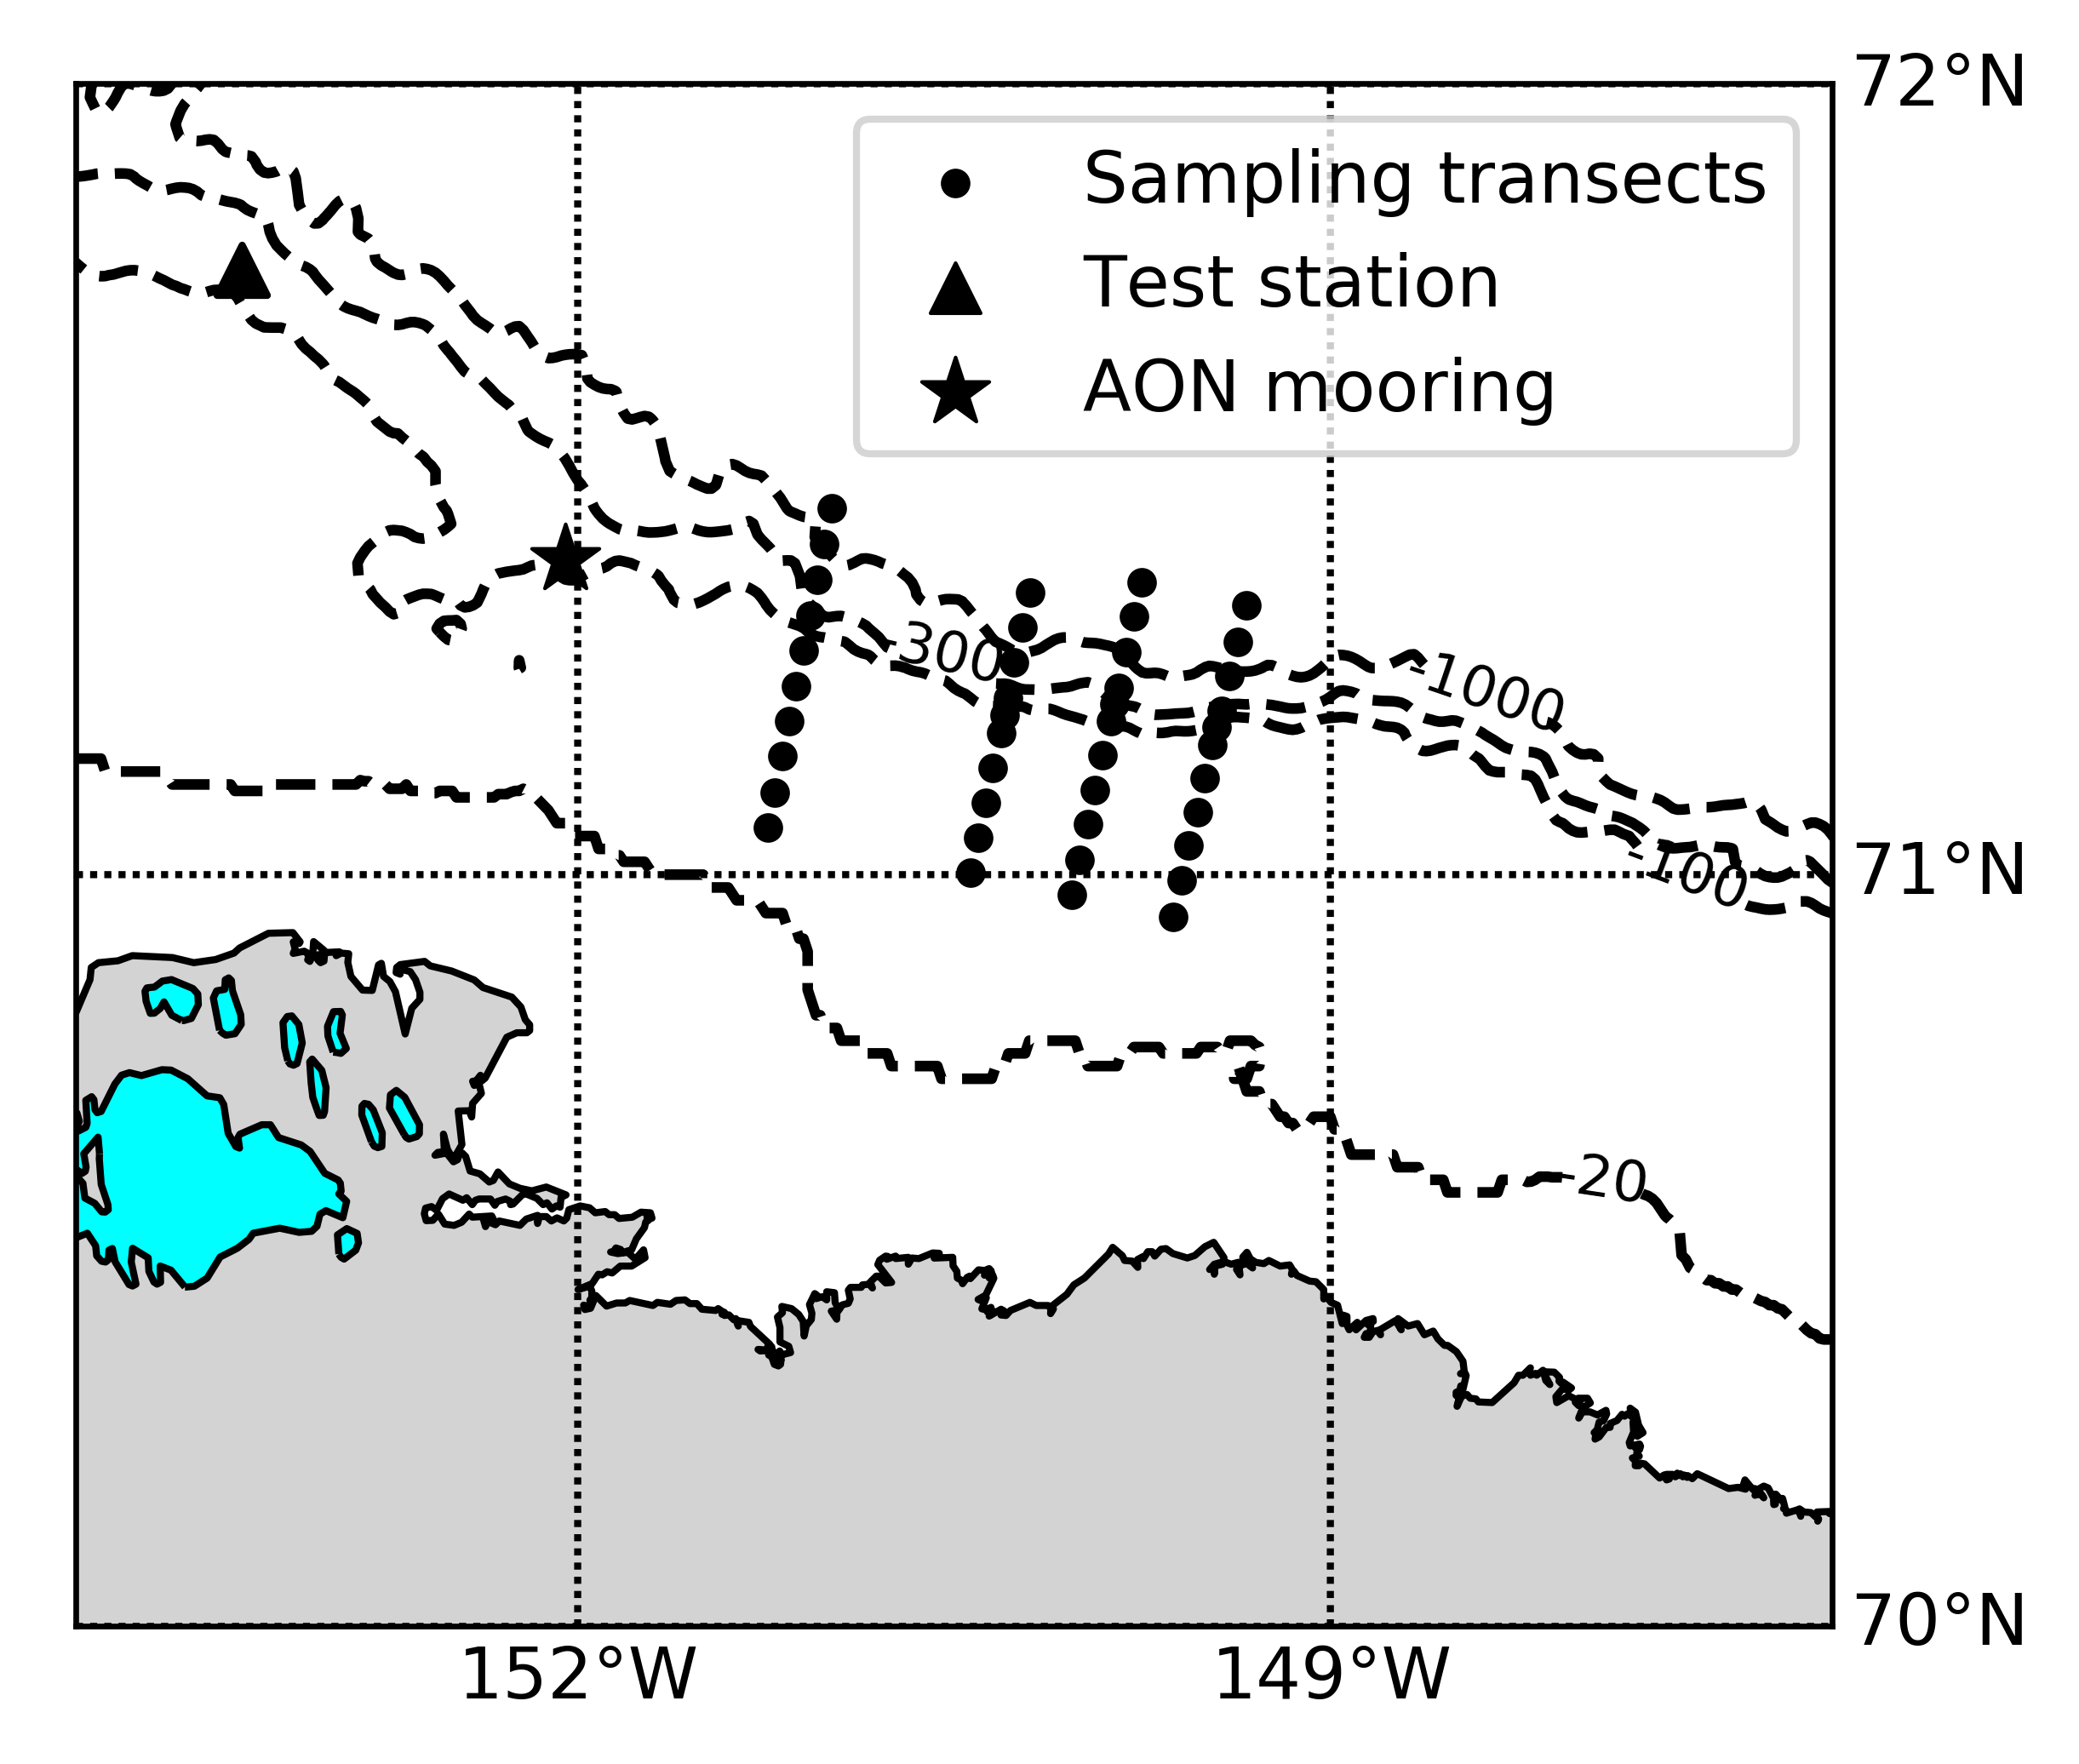

In [14]:
#Use this link to choose your bathymetry area. Then use gdal_translate to convert to nc.
#gdal_translate -of netCDF exportImage.tiff output.nc
#https://maps.ngdc.noaa.gov/viewers/wcs-client/

#Import station lat longs, I don't use this in this figure.
# infile = "./OlderFiles/CTD_LatLong_T2.txt"
# Cooords = pd.read_csv(infile, delimiter = '\t')


#create array of bathymetry data covering the lat/lon of my study area, using the 
#lat lon of my grid from the .nc file exported and then converted from the geotiff file
#from NOAA

#Create the plot, change as needed
fig, ax = plt.subplots(1,1, dpi = 600)


#The width and height of this map projection is where you'll change the zoom. Just have to 
#play around with it. The lat_0 is the base lat and the lon_0 is the base lon, what that means
#is that this is where the map will be centered around. Look up projection types to find 
#best type for you.
m = Basemap(projection='merc',llcrnrlat=70,urcrnrlat=72,\
            llcrnrlon=-154,urcrnrlon=-147,lat_ts=0,resolution='h')
#self explanatory commands
m.drawcoastlines()
m.fillcontinents(color='lightgrey',lake_color='aqua')
#m.drawcountries()

#Here you need to convert the lat lon from the bathymetry file to map coordinates
x, y = m(bx, by)

# contour bathymetry over the map, levels chooses what depths you want contoured
cs = m.contour(x,y,bathy,inline=True,colors = 'Black',levels = [-1000,-300
                                                                ,-100,-20])
#Label contours, not used here:
plt.clabel(cs, fontsize=8,fmt = '%1.0f')

#In order to transform coordinates the lat lon need to be in a vector not a pandas dataframe
#here they are converted and then transormed to map coords
T2Lon = station_loc.Long_deg.to_numpy()
T2Lat = station_loc.Lat_deg.to_numpy()
x, y = m(T2Lon,T2Lat)  # transform coordinates
#scatter these coords (sample stations). Look up these variables and change to your liking
mms = plt.scatter(x, y, 10,marker = 'o', facecolors='k', edgecolors='k', color='k')


x,y = m(-153.3399,71.76914)
mm1 = plt.scatter(x, y, 50,marker = '^',linewidths=0.5, facecolors='k', edgecolors='k',zorder =2)
mm = plt.scatter(x, y, 50,marker = '^',linewidths=1, facecolors='k', edgecolors='k',zorder =2)

x,y = m(-152.05,71.405)
mm2 = plt.scatter(x, y, 100,marker = '*',linewidths=0.5, facecolors='k', edgecolors='k',zorder =2)

handles = [mms,mm1,mm2]
labels = ['Sampling transects','Test station','AON mooring']
legend = plt.legend(handles,labels)

#Plot, and label the coordinate lines
parallels = np.arange(1,82,1)
#Labels has to do with sides of the figure that will have labels.
#IMPORTANT: zorder can be changed if the lines are over any important information. You can
#make them go to the back. The 6. and 10. in the arange command is the frequency of the lines.
#Change to your liking.
m.drawparallels(parallels,labels=[False,True,True,False],zorder = 1)
meridians = np.arange(10.,351.,3.)
m.drawmeridians(meridians,labels=[True,True,False,True],zorder = 1)
#These are complicated annotations. This will change pased on your map and need. Honestly,
#just need to play around with them. x,y are coordinates, but the rest you should google 
#and adjust to your liking.


# #Following is plotting the types and names of the symbols used in this plot
# x,y = m(-145,68.9)
# plt.scatter(x,y,18,marker = 'D',edgecolors='k',color = 'w',zorder = 2)
# x,y = m(-144.3,68.75)
# txt = 'Sampling transect'
# ax.annotate(txt, (x,y),fontsize = 7)
# #Blais
# x,y = m(-145.05,68.5)
# plt.scatter(x,y,20,marker = 'P',edgecolors='k',color = 'k',label = 'Blais 2012',zorder = 2)
# x,y = m(-144.4,68.35)
# txt = 'Aug. \'08-\'09'
# ax.annotate(txt, (x,y),fontsize = 7)
# # Sipler
# x,y = m(-145.15,68.1)
# plt.scatter(x,y,20,marker = 'o',edgecolors='k',color = 'k',label = 'Blais 2012',zorder = 2)
# x,y = m(-144.5,67.95)
# txt = 'Aug. \'11'
# ax.annotate(txt, (x,y),fontsize = 7)
# #Harding
# x,y = m(-145.2,67.7)
# plt.scatter(x,y,20,marker = '^',edgecolors='k',color = 'k',label = 'Blais 2012',zorder = 2)
# x,y = m(-144.6,67.55)
# txt = 'Sep. \'16'
# ax.annotate(txt, (x,y),fontsize = 7)
# x,y = m(-156.7811, 71.1)
# props = dict(boxstyle='round', facecolor='wheat', alpha=0.9)
# txt = 'Pt. Barrow'
# ax.annotate(txt,(x,y),fontsize = 4,color = 'k',bbox=props)

# #Plot NFix variables on a normalized colormap, with different types of markers for each
# #paper, annotated types can be found above.

# #Convert lat long pandas to numpy vectors
# x,y = m(NFixR.Longitude.to_numpy(),NFixR.Latitude.to_numpy())
# #Normalize the colormap to your min max of your data
# min_val_nfix = min(NFixR.NFR_nmolNLd)
# max_val_nfix = max(NFixR.NFR_nmolNLd)
# cmap_nfix = cm.get_cmap('cmo.amp') # or any other one
# norm_nfix = matplotlib.colors.Normalize(min_val_nfix, max_val_nfix) # the color maps work for [0, 1]
# #Plot each measurement in scatter with its color from the normalized cmap.
# for i in range(0,38,1):
#     z = NFixR.NFR_nmolNLd[i]
#     color_i_nfix= cmap_nfix(norm(z))
#     plt.scatter(x[i],y[i],30,marker = '^',color = color_i_nfix,zorder = 2)
# for i in range(38,46,1):
#     z = NFixR.NFR_nmolNLd[i]
#     color_i_nfix= cmap_nfix(norm(z))
#     plt.scatter(x[i],y[i],30,marker = 'o',color = color_i_nfix,zorder = 2)
# for i in range(46,52,1):
#     z = NFixR.NFR_nmolNLd[i]
#     color_i_nfix= cmap_nfix(norm(z))
#     plt.scatter(x[i],y[i],30,marker = 'P',color = color_i_nfix,zorder = 2)
    
    
# #Add your custom colorbar, scaled to your data.
# cmmapable_nfix = cm.ScalarMappable(norm_nfix, cmap_nfix)
# cmmapable_nfix.set_array(range(int(min_val_nfix), int(max_val_nfix)))
# #Where it will be plotted, you'll need to play around with this. Numbers were done by trial and error.
# cax = fig.add_axes([0.234, 1.03, 0.56, 0.05])
# cf = fig.colorbar(cmmapable_nfix, orientation="horizontal",cax = cax, label = 'Nitrogen Fixation Rate (nmol N $L^{-1}$ $d^{-1}$)',format = "%d")
# cf.set_label('Surface $N_{2}$ fixation rate (nmol N $L^{-1}$ $d^{-1}$)', labelpad=-40)
plt.show()

#fig.savefig('./SKQ_map_Euk.jpg',bbox_inches = "tight")